In [3]:
import pandas as pd
import numpy as np
 
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
 
import matplotlib.pyplot as plt

In [4]:
data_url = 'https://raw.githubusercontent.com/data-to-insight/ERN-sessions/main/data/diabetes_data.csv'
 
df = pd.read_csv(data_url)
 
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
# Independent
X = df['BMI'].to_numpy().reshape(-1,1)
 
# Dependent
y = df['Glucose'].to_numpy().reshape(-1,1)
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [7]:
regr = linear_model.LinearRegression()
 
regr.fit(X_train, y_train)
 
regr = linear_model.LinearRegression()
 
regr.fit(X_train, y_train)
 
y_pred = regr.predict(X_test)
 

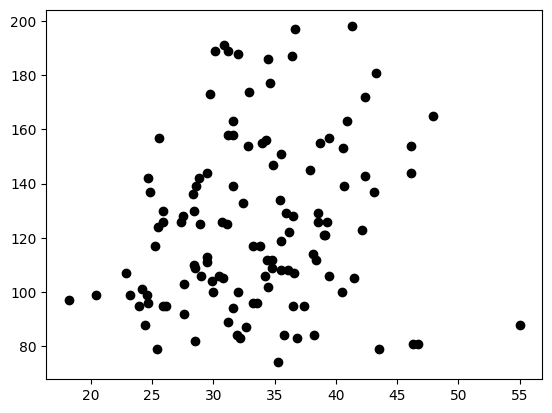

AttributeError: Line2D.set() got an unexpected keyword argument 'lbael'

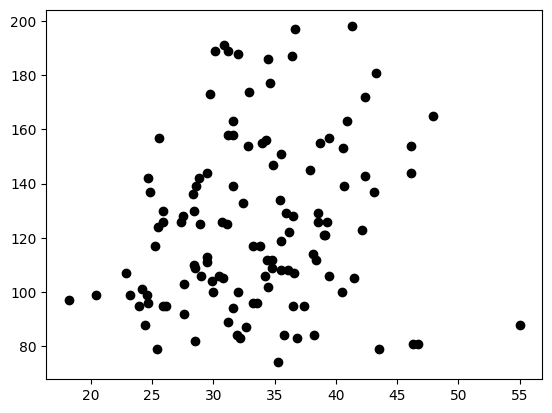

In [8]:
plt.scatter(X_test, y_test, color="black")
 
plt.show()
 
plt.scatter(X_test, y_test, color="black", label='Actual values')
plt.plot(X_test, y_pred, lbael='Predicted values')
 
plt.xlabel('BMI')
plt.ylabel('Blood Glucose')
 
plt.title('BMI vs Blood Glucose')
 
plt.legend(loc="upper left")
 
plt.show()
 

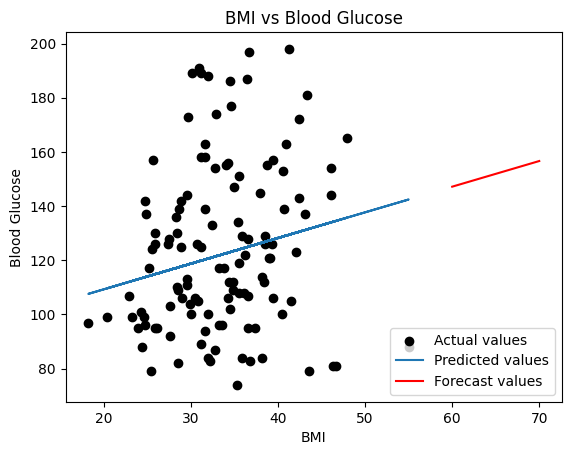

In [9]:
prediciton_df = pd.DataFrame()
 
prediciton_df['BMI'] = np.arange(60, 71)
 
prediciton_df['Glucose'] = regr.predict(np.arange(60,71).reshape(-1,1))
 
prediciton_df
 
plt.scatter(X_test, y_test, color="black", label='Actual values')
plt.plot(X_test, y_pred, label='Predicted values')
plt.plot(prediciton_df['BMI'], prediciton_df['Glucose'], color='Red', label='Forecast values')
 
plt.xlabel('BMI')
plt.ylabel('Blood Glucose')
 
plt.title('BMI vs Blood Glucose')
 
plt.legend(loc="lower right")
 
plt.show()
 

In [5]:
# selecting data
df = df[df['Insulin'].astype('int') != 0]
 
X = df[['BMI', 'Insulin']]
y = df['Glucose'].to_numpy().reshape(-1,1)
 
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
 
# fitting and predicting
mv_regr = linear_model.LinearRegression()
 
mv_regr.fit(X_train, y_train)
y_pred = mv_regr.predict(X_test)
 
# selecting data
df = df[df['Insulin'].astype('int') != 0]
 
X = df[['BMI', 'Insulin']]
y = df['Glucose'].to_numpy().reshape(-1,1)
 
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
 
# fitting and predicting
mv_regr = linear_model.LinearRegression()
 
mv_regr.fit(X_train, y_train)
y_pred = mv_regr.predict(X_test)
 
# look at model quality
print(f'Coef Det: {mv_regr.coef_}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'R squared: {r2_score(y_test, y_pred)}')
 
# make predicitons
mv_regr.predict(pd.DataFrame(
    [
        {'BMI':29,
        'Insulin':94}
    ]
))
 

Coef Det: [[0.38362869 0.1621048 ]]
MSE: 712.0214095461896
R squared: 0.2809328392385989


array([[110.09768368]])

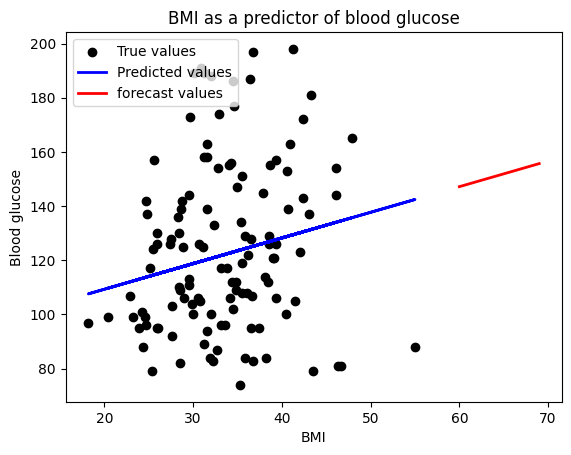

In [10]:
prediction_df = pd.DataFrame()
 
prediction_df['BMI'] = np.arange(60, 70)
 
prediction_df['Glucose'] = regr.predict(np.arange(60, 70).reshape(-1,1))
 
prediction_df
 
plt.scatter(X_test, y_test, color='black', label='True values')
plt.plot(X_test, y_pred, color='blue', linewidth=2, label='Predicted values')
plt.plot(prediction_df['BMI'], prediction_df['Glucose'], color='red', linewidth=2, label='forecast values')
 
plt.xlabel('BMI')
plt.ylabel('Blood glucose')
 
plt.legend(loc="upper left")
 
plt.title('BMI as a predictor of blood glucose')
 
plt.show()
 